In [2]:
# Question 2: Classification Implementation

# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# To import the dataset using pandas

# Read the csv as a dataframe
df_train = pd.read_csv("train_1_5.csv", header=None)
df_test = pd.read_csv("test_1_5.csv", header=None)

# Separate the features and labels
X_train = df_train.iloc[:, :2].values
y_train = df_train.iloc[:, 2].values
X_test = df_test.iloc[:, :2].values
y_test = df_test.iloc[:, 2].values

In [4]:
# Part (a): Implemention of perception algorithm
# Perceptron Update Rule: 
    # 1. Initialize theta and offset to 0
    # 2. For each example in the training set: 
    #   - If the correct class label, continue
    #   - else, theta = theta + y*x, offset = offset + y
    # 3. Terminate if the training error is zero or a pre-determined number of epochs have been reached
def perception_update(X, y, theta, offset):
    for i in range(len(X)):
        if (y[i] * (np.dot(theta, X[i]) + offset) <= 0):
            theta = theta + y[i] * X[i]
            offset = offset + y[i]
    return theta, offset

def perception(X, y, epochs):
    theta = np.zeros(X.shape[1])
    offset = 0
    for i in range(epochs):
        theta, offset = perception_update(X, y, theta, offset)
    return theta, offset

def accuracy(X, y, theta, offset):
    score = 0
    for i in range(len(X)):
        if (y[i] * (np.dot(theta, X[i]) + offset) > 0):
            score += 1
    return score / len(X)

In [5]:
# Part (a): Run the perceptron algorithm with offset on the training data for 1 epoch (i.e. traversing the training set 1 time), report the theta, offset and accuracy on the test set.
theta_1, offset_1 = perception(X_train, y_train, 1)
accuracy_1 = accuracy(X_test, y_test, theta_1, offset_1)
print(f"1 epoch: theta = {theta_1}, offset = {offset_1}, accuracy = {accuracy_1}")

1 epoch: theta = [-2.4483233  -5.88190688], offset = 0.0, accuracy = 0.9670658682634731


In [6]:
# Part (b): Run the perceptron algorithm with offset on the training data for 5 epochs (i.e. traversing the training set 5 times), report the theta, offset and accuracy on the test set.
theta_5, offset_5 = perception(X_train, y_train, 5)
accuracy_5 = accuracy(X_test, y_test, theta_5, offset_5)
print(f"5 epochs: theta = {theta_5}, offset = {offset_5}, accuracy = {accuracy_5}")

5 epochs: theta = [-2.05895878 -8.83521606], offset = 1.0, accuracy = 0.9670658682634731


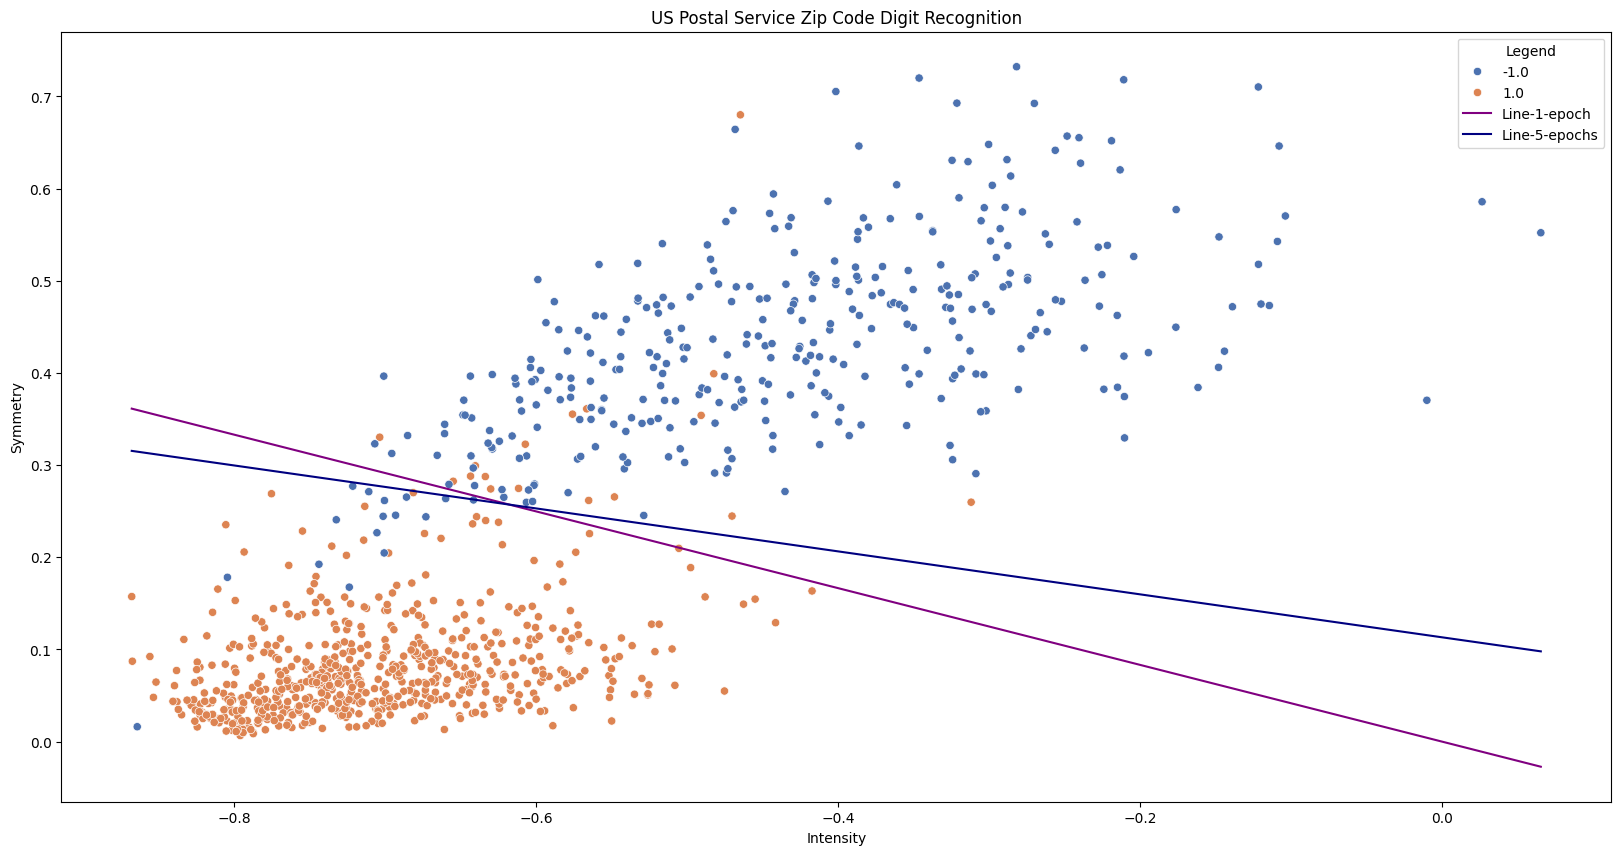

<Figure size 2000x1200 with 0 Axes>

In [8]:
# Part (c): Plot the test data on a 2-D scatter plot, clearly label the positive examples and negative examples. Then, overlay the 2 decision boundaries (i.e. the lines) you obtained from (a) and (b) on the same scatter plot. Label the first line as "Line-1-epoch" and the second line as "Line-5-epochs" also in the legend.

intensity = X_test[:, 0]
symmetry = X_test[:, 1]

# Plotting the test data
sns.scatterplot(x=intensity, y=symmetry, hue=y_test, palette="deep", legend=True).set_title("US Postal Service Zip Code Digit Recognition")

# Decision Boundaries
# y = sign(theta . x + offset)
# for 2 dimensional data, x = [x1, x2] and theta = [theta1, theta2] = (theta1 * x1 + theta2 * x2 + offset = 0)

# solving for x2, we get:
# theta2 * x2 = -theta1 * x1 - offset => x2 = (-theta1 * x1 - offset) / theta2

# therefore, we get the equation of the line y = mx + b, 
# where m = -theta1 / theta2 and b = -offset / theta2

# Line 1 epoch
x_values = np.linspace(intensity.min(), intensity.max(), 100)
y_values_1 = -(theta_1[0] * x_values + offset_1) / theta_1[1]
plt.plot(x_values, y_values_1, label="Line-1-epoch", color="purple")

# Line 5 epochs
y_values_5 = -(theta_5[0] * x_values + offset_5) / theta_5[1]
plt.plot(x_values, y_values_5, label="Line-5-epochs", color="navy")

plt.xlabel("Intensity")
plt.ylabel("Symmetry")
plt.legend(title="Legend")
plt.figure(figsize=(20, 12))
plt.rcParams["figure.figsize"] = (20, 20)

# Display the plot
plt.show()


### **Part (d): Is it possible to classify all samples correctly? That is, is it possible to achieve 100% accuracy? Why?**

Whether it is possible to classify all samples correctly (e.g. achieve 100% accuracy) using the perceptron algorithm depends on whether the data is linearly separable. 

### *Linearly Separable Data*
The perceptron algorithm is guranteed to find a separating hyperplane (decision boundary) that classifies all the training data points correctly **if and only if** the data is linearly separable. In the case it is linearly separable, the algorithm will converge to a solution in a finite number of steps. 

### *Non-Linearly Separable*
If the data is **not linearly separable**, the perceptron algorithm will not be able to classify all samples correctly, no matter the number of epochs being ran. The algorithm will keep updating the weights but will never converge to a solution that strictly accurately classifies all points correctly. 

### *Context*
In the context of the *US Postal Service Zip Code Handwritten Classification*, our objective is to classify the digits **1** and **5** based on the two features: **Intensity** and **Symmetry** which are features that may not provide a perfect separation betweeen the digits. While the digit **1** is more symmetrical and the digit **5** has higher intensity, there might be significant overlap in the feature values for some samples. 

If the feature values overlap (_e.g. some digit 1 samples have lower **symmetry** or some digit 5 samples have lower **intensity**_), the perceptron algorithm will not be able to find a linear boundary that perfectly separates the two classes.

By looking at the graph above being plotted, there exists orange samples **line-5-epochs** above as well as below the line, indicating that the dataset is not linearly separable. Given that the accuracy did not improve beyond **96.7%** after multiple epochs, it suggests that the data may not be perfectly separable. | 

### *Conclusion*
In conclusion, to determine whether it is possible to accurately classify all samples correctly (**100% accuracy**), one would need to check the separability of the data. It is only able to achieve it if the dataset is linearly separable. In this case, features like **Intensity** and **Symmetry** are highly likely to overlap and the algorithm would be not able to perfectly differentiate between the classes since it is likely that some data samples would not be able to fit the general pattern. 

Therefore, it is highly unlikely to achieve **100% accuracy** on this dataset with the perceptron algorithm, since there would be a potential overlap in feature values. This indication shows that the perceptron algorithm wil not be able to find a hyperplane (decision boundary) that perfectly separates all training samples; indicating that the dataset is probably not **linearly separable**.